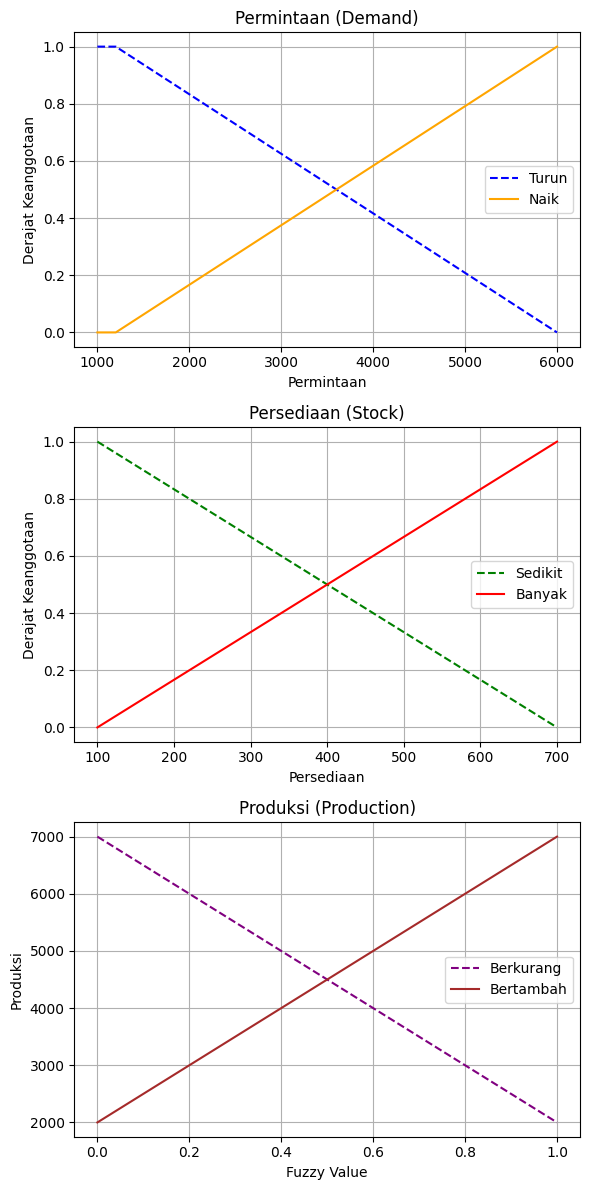

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Define Fuzzy Logic classes
class Fuzzy:
    def __init__(self):  # Fixed __init__ method
        self.min = 0
        self.max = 0

    def down(self, x):
        return max(0, (self.max - x) / (self.max - self.min))

    def up(self, x):
        return max(0, (x - self.min) / (self.max - self.min))

    def rev_down(self, f):
        return self.max - f * (self.max - self.min)

    def rev_up(self, f):
        return f * (self.max - self.min) + self.min


class Demand(Fuzzy):
    def __init__(self, min_value=1000, max_value=6000):  # Added min_value and max_value parameters
        self.min = min_value
        self.max = max_value

    def decrease(self, x):
        if x <= self.min:
            return 1
        elif x >= self.max:
            return 0
        return self.down(x)

    def increase(self, x):
        if x <= self.min:
            return 0
        elif x >= self.max:
            return 1
        return self.up(x)


class Stock(Fuzzy):
    def __init__(self):  # Fixed __init__ method
        self.min = 100
        self.max = 700

    def a_few(self, x):
        if x <= self.min:
            return 1
        elif x >= self.max:
            return 0
        return self.down(x)

    def a_lot(self, x):
        if x <= self.min:
            return 0
        elif x >= self.max:
            return 1
        return self.up(x)


class Production(Fuzzy):
    def __init__(self):  # Fixed __init__ method
        self.min = 2000
        self.max = 7000

    def reduce(self, fuzzy_value):
        return self.rev_down(fuzzy_value)

    def add(self, fuzzy_value):
        return self.rev_up(fuzzy_value)


# Instantiate fuzzy sets with custom min for Demand
demand = Demand(min_value=1200, max_value=6000)  # Custom min value for Demand
stock = Stock()
production = Production()

# Define the ranges for each variable
x_demand = np.linspace(1000, 6000, 500)  # Range for Demand
x_stock = np.linspace(100, 700, 500)     # Range for Stock
fuzzy_values = np.linspace(0, 1, 500)    # Range for fuzzy outputs (Production)

# Calculate fuzzy membership values
demand_decrease = [demand.decrease(x) for x in x_demand]
demand_increase = [demand.increase(x) for x in x_demand]

stock_a_few = [stock.a_few(x) for x in x_stock]
stock_a_lot = [stock.a_lot(x) for x in x_stock]

production_reduce = [production.reduce(f) for f in fuzzy_values]
production_add = [production.add(f) for f in fuzzy_values]

# Create subplots for the variables
fig, axs = plt.subplots(3, 1, figsize=(6, 12))

# Demand Plot
axs[0].plot(x_demand, demand_decrease, label="Turun", color="blue", linestyle="--")
axs[0].plot(x_demand, demand_increase, label="Naik", color="orange", linestyle="-")
axs[0].set_title("Permintaan (Demand)")
axs[0].legend(loc="best")
axs[0].grid(True)
axs[0].set_xlabel("Permintaan")
axs[0].set_ylabel("Derajat Keanggotaan")

# Stock Plot
axs[1].plot(x_stock, stock_a_few, label="Sedikit", color="green", linestyle="--")
axs[1].plot(x_stock, stock_a_lot, label="Banyak", color="red", linestyle="-")
axs[1].set_title("Persediaan (Stock)")
axs[1].legend(loc="best")
axs[1].grid(True)
axs[1].set_xlabel("Persediaan")
axs[1].set_ylabel("Derajat Keanggotaan")

# Production Plot
axs[2].plot(fuzzy_values, production_reduce, label="Berkurang", color="purple", linestyle="--")
axs[2].plot(fuzzy_values, production_add, label="Bertambah", color="brown", linestyle="-")
axs[2].set_title("Produksi (Production)")
axs[2].legend(loc="best")
axs[2].grid(True)
axs[2].set_xlabel("Fuzzy Value")
axs[2].set_ylabel("Produksi")

# Display the plots
plt.tight_layout()
plt.show()
